In [ ]:
from google.colab import files
uploaded=files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_87 (1).zip to API_SP.POP.TOTL_DS2_en_csv_v2_87 (1).zip


In [ ]:
import zipfile
import os

zip_file_name = "API_SP.POP.TOTL_DS2_en_csv_v2_87 (1).zip"

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("extracted_folder")

In [ ]:
extracted_path = "extracted_folder"
print(os.listdir(extracted_path))

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_87.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv']


In [ ]:
import pandas as pd

csv_files = [
    "extracted_folder/API_SP.POP.TOTL_DS2_en_csv_v2_87.csv",
    "extracted_folder/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv",
    "extracted_folder/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv"
]


for file in csv_files:
    print(f"Reading file: {file}")

    try:
        df = pd.read_csv(file, sep=None, engine="python")
        print(df.head())
    except Exception as e:
        print(f"Error reading {file}: {e}")

Reading file: extracted_folder/API_SP.POP.TOTL_DS2_en_csv_v2_87.csv
Error reading extracted_folder/API_SP.POP.TOTL_DS2_en_csv_v2_87.csv: Expected 3 fields in line 5, saw 69
Reading file: extracted_folder/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv
  ﻿"INDICATOR_CODE"     INDICATOR_NAME  \
0       SP.POP.TOTL  Population, total   

                                         SOURCE_NOTE  \
0  Total population is based on the de facto defi...   

                                 SOURCE_ORGANIZATION  Unnamed: 4  
0  (1) United Nations Population Division. World ...         NaN  
Reading file: extracted_folder/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv
  ﻿"Country Code"                     Region          IncomeGroup  \
0             ABW  Latin America & Caribbean          High income   
1             AFE                        NaN                  NaN   
2             AFG                 South Asia           Low income   
3             AFW                        NaN   

In [ ]:
df_main= pd.read_csv("extracted_folder/API_SP.POP.TOTL_DS2_en_csv_v2_87.csv", sep=",", encoding="utf-8", skiprows=4)

In [ ]:
df_main.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


In [ ]:
df_main.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,2
...,...
2020,1
2021,1
2022,1
2023,1


In [ ]:
df_main=df_main.drop(columns=['Unnamed: 68'])

In [ ]:
cols_to_fill = df_main.columns[4:]
df_main[cols_to_fill] = df_main[cols_to_fill].apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
df_main.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
1960,0
...,...
2019,0
2020,0
2021,0
2022,0


In [ ]:
df_metadata_indicator=pd.read_csv("extracted_folder/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv")

In [ ]:
df_metadata_indicator.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


In [ ]:
df_metadata_indicator.drop(columns=['Unnamed: 4'])

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...


In [ ]:
df_metadata_country=pd.read_csv("extracted_folder/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv")

In [ ]:
df_metadata_country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
df_metadata_country.isna().sum()

,0
Country Code,0
Region,48
IncomeGroup,49
SpecialNotes,138
TableName,0
Unnamed: 5,265


In [ ]:
df_metadata_country[['Region', 'IncomeGroup', 'SpecialNotes']] = df_metadata_country[['Region', 'IncomeGroup', 'SpecialNotes']].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df_metadata_country.drop(columns=['Unnamed: 5'])

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,Fiscal year end: March 31; reporting period fo...,Aruba
1,AFE,Europe & Central Asia,High income,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,Europe & Central Asia,High income,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Fiscal year end: March 31; reporting period fo...,Kosovo
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [ ]:
# Print all columns from each dataset
print("Main Dataset Columns:\n", df_main.columns)
print("\nIndicator Metadata Columns:\n", df_metadata_indicator.columns)
print("\nCountry Metadata Columns:\n", df_metadata_country.columns)

Main Dataset Columns:
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

Indicator Metadata Columns:
 Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')

Country Metadata Columns:
 Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')


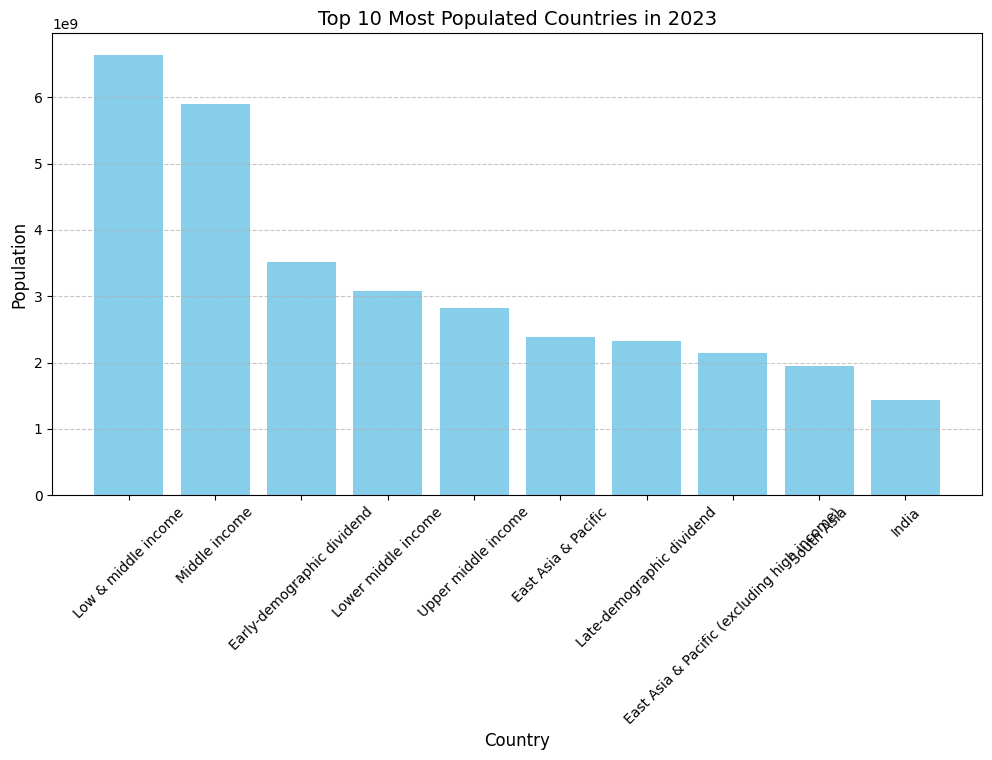

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("extracted_folder/API_SP.POP.TOTL_DS2_en_csv_v2_87.csv", skiprows=4)

# Selecting the 2023 population and filtering only countries
df_2023 = df[['Country Name', '2023']].dropna()
df_2023 = df_2023[~df_2023['Country Name'].str.contains('World|IBRD|IDA', na=False)]

# Getting the top 10 most populated countries
df_top10 = df_2023.sort_values(by='2023', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_top10['Country Name'], df_top10['2023'], color='skyblue')

# Labeling and titles
plt.xlabel("Country", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.title("Top 10 Most Populated Countries in 2023", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

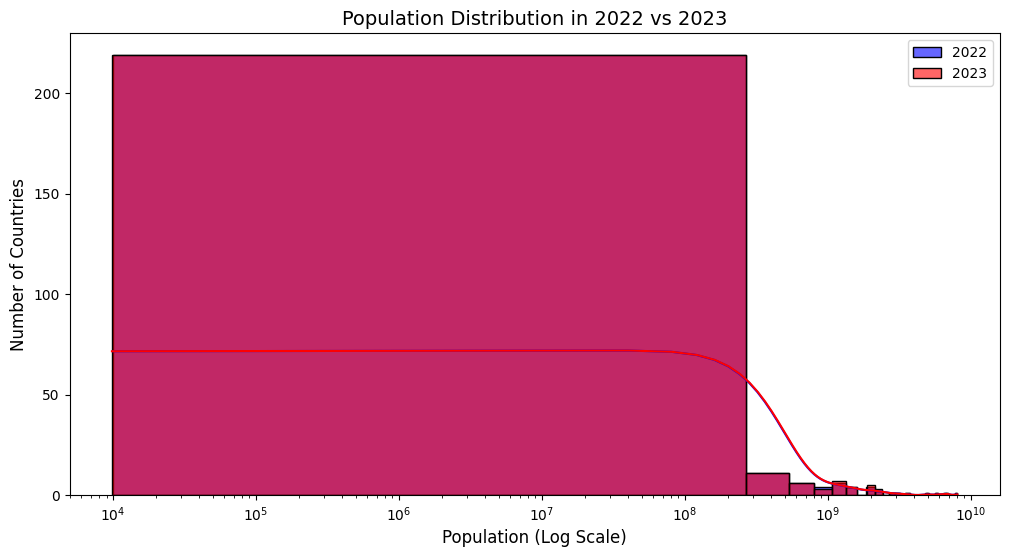

In [ ]:
import seaborn as sns
import numpy as np

# Selecting data for 2022 and 2023
df_selected = df[['Country Name', '2022', '2023']].dropna()
pop_2022 = df_selected['2022']
pop_2023 = df_selected['2023']

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(pop_2022, bins=30, kde=True, color="blue", label="2022", alpha=0.6)
sns.histplot(pop_2023, bins=30, kde=True, color="red", label="2023", alpha=0.6)

# Log scale for better visualization
plt.xscale("log")

# Labels and title
plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.title("Population Distribution in 2022 vs 2023", fontsize=14)
plt.legend()

plt.show()

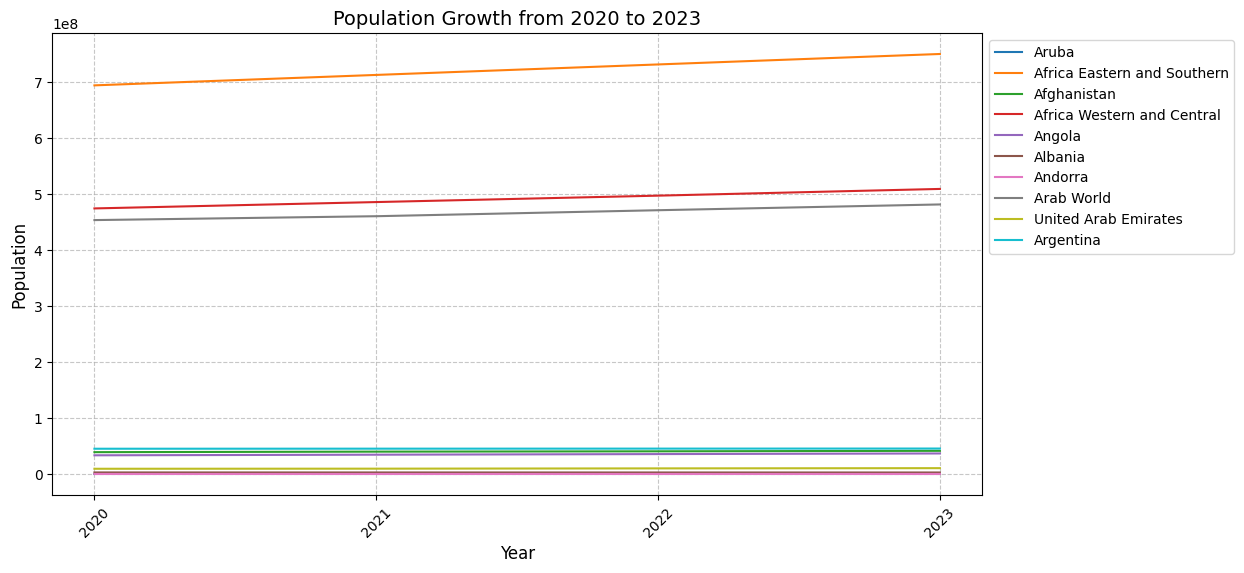

In [ ]:
# Selecting population data from 2020 to 2023
df_growth = df[['Country Name', '2020', '2021', '2022', '2023']].dropna()
df_growth = df_growth.set_index("Country Name").T  # Transpose for plotting

# Plotting
plt.figure(figsize=(12, 6))
for country in df_growth.columns[:10]:  # Show only the first 10 countries for clarity
    plt.plot(df_growth.index, df_growth[country], label=country, linewidth=1.5)

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.title("Population Growth from 2020 to 2023", fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

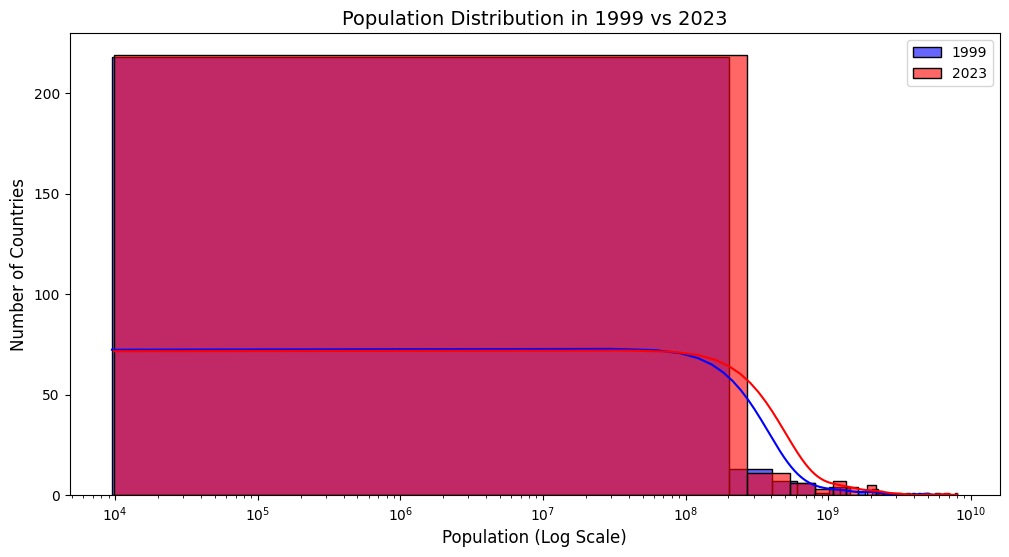

In [ ]:
# Selecting data for 1999 and 2023
df_selected = df[['Country Name', '1999', '2023']].dropna()
pop_1999 = df_selected['1999']
pop_2023 = df_selected['2023']

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(pop_1999, bins=30, kde=True, color="blue", label="1999", alpha=0.6)
sns.histplot(pop_2023, bins=30, kde=True, color="red", label="2023", alpha=0.6)

# Log scale
plt.xscale("log")

# Labels and title
plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.title("Population Distribution in 1999 vs 2023", fontsize=14)
plt.legend()

plt.show()